In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

In [2]:
def ODE_UpperLowerModel(params, ICs, t_range):
    #paramters lambda_u, lambda_l, b_u, b_l, g, d, p, kappa, c, gamma, k, w, delta, f, r, t_1, t_2
    lmbda = params[0:2]
    b = params[2:4]
    g = params[4]
    d = params[5]
    p = params[6]
    kappa = params[7]
    c = params[8]
    gamma = params[9]
    k = params[10]
    w = params[11]
    delta = params[12]
    f = params[13]
    r = params[14]
    transport = params[15:17]

    #states are U1, E1, I1, D1, V1, U2, E2, I2, D2, V2, F, X
    states = np.copy(ICs)

    def diff_equ(INP, t):
        DT = np.zeros(12) + 0.0
        for i in range(0,2):
            SP = 5*i
            DT[SP] = lmbda[i] * INP[SP+3] - b[i] * INP[SP] * INP[SP+4]
            DT[SP+1] = b[i] * INP[SP] * INP[SP+4] - g * INP[SP+1]
            DT[SP+2] = g * INP[SP+1] - d * INP[SP+2]
            DT[SP+3] = d * INP[SP+2] - lmbda[i] * INP[SP+3]
            DT[SP+4] = p * INP[SP+2] / (1 + i * kappa * INP[10]) - c * INP[SP+4] - gamma * b[i] * INP[SP] * INP[SP+4] - k * i * INP[SP+4] * INP[11] - transport[i] * INP[SP+4] + transport[1-i] * INP[(1-i) * 5 + 4]
        DT[10] = w * INP[9] - delta * INP[10]
        DT[11] = f * INP[9] + r * INP[11]

        return DT
    

    return spi.odeint(diff_equ,states,t_range)








In [3]:
#states are U1, E1, I1, D1, V1, U2, E2, I2, D2, V2, F, X
myICS = np.array([1e9, 0, 0, 0, 40000, 1e9, 0, 0, 0, 0, 0, 0]) + 0.0

#paramters lambda_u, lambda_l, b_u, b_l, g, d, p, kappa, c, gamma, k, w, delta, f, r, t_1, t_2
myParams = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]) + 0.0


In [4]:
#Rough paramter values, based off of a paper. May want to attempt other ones instead

#lambda
myParams[0] = 0
myParams[1] = 0.015


#b
myParams[2] = 1e-7
myParams[3] = 1e-7

#g, c, d
myParams[4] = 4.0
myParams[5] = 2.0
myParams[8] = 10.0

#p
myParams[6] = 1

#kappa
myParams[7] = 0.045

#gamma
myParams[9] = 0.13

#k
myParams[10] = 10

#w
myParams[11] = 10

#delta
myParams[12] = 1

#f
myParams[13] = 1e-6

#r
myParams[14] = 0.27

In [5]:
#Solve our ODE
timevals = np.linspace(0,30.0,1000)
OUT = ODE_UpperLowerModel(myParams, myICS, timevals)

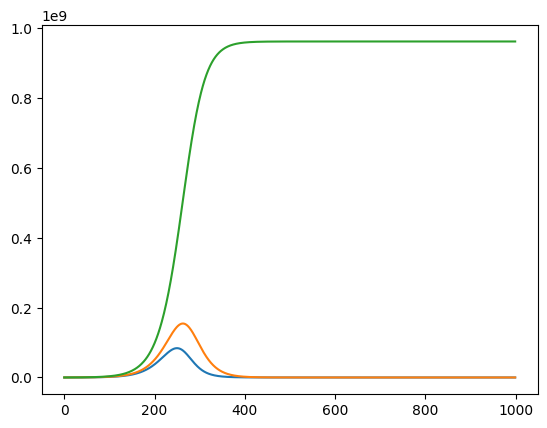

In [6]:
#Eclipsed, Infected and Dead cells in URT
plt.plot(OUT[:,1])
plt.plot(OUT[:,2])
plt.plot(OUT[:,3])
plt.show()

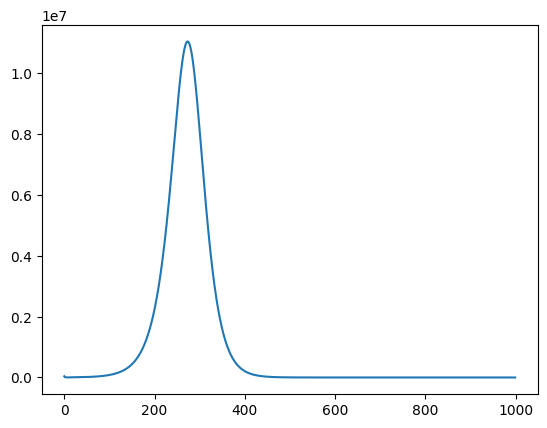

In [7]:
#URT Viruses
plt.plot(OUT[:,4])

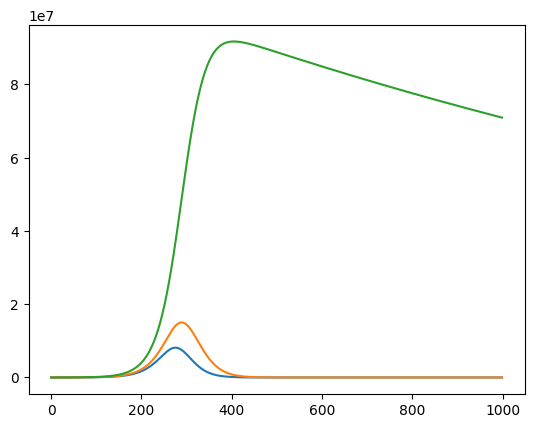

In [8]:
#Eclipsed, Infected and Dead cells in LRT
plt.plot(OUT[:,6])
plt.plot(OUT[:,7])
plt.plot(OUT[:,8])

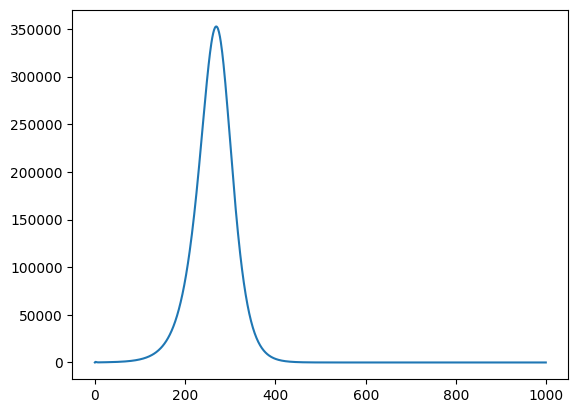

In [9]:
#LRT Viruses
plt.plot(OUT[:,9])